C:\Users\j-ehy\AppData\Local\Temp\ipykernel_24804\1711610310.py:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


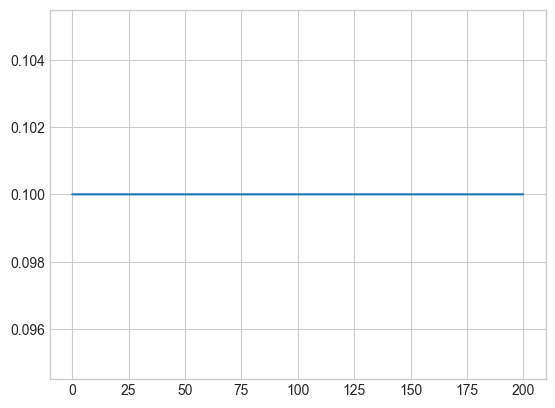

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from simulator.csad import CSADMan3DOF
import utils

plt.style.use('seaborn-whitegrid')

dt = 0.1
t = np.arange(0, 200, dt)

vessel = CSADMan3DOF(dt)
x = np.zeros((len(t), 6))

eta_d = np.array([0, 0, 0])
nu_d = np.array([0, 0, 0])

zi = np.zeros(3)
def controller(eta, nu, zi):
    # Simple PID Controller
    Kp = np.diag([10, 20, 40])
    Kd = np.diag([70, 70.5, 70.])
    Ki = np.diag([.5, .5, 1])
    z1 = utils.Rz(eta[2]).T@(eta - eta_d)
    z2 = nu - nu_d
    zi += dt*z1
    return -Kp@z1 - Kd@z2 - Ki@zi

tau_env = np.zeros(3)
tau_env[0] = 0
tau_env[1] = 0

tau = np.zeros(3)
#tau = np.ones(3)*100
tau[2] = 0
Uc = np.ones(len(t))*0.1

beta_c = 179

for i in range(1, len(t)):
    vessel.x_dot(Uc[i], beta_c, tau)
    vessel.integrate()
    tau = controller(vessel.get_eta(), vessel.get_nu(), zi)
    x[i] = vessel._x

plt.plot(t, Uc)
plt.show()

In [2]:
def plot_results(x):
    x[:, 2] = np.rad2deg(x[:, 2])
    x[:, 5] = np.rad2deg(x[:, 5])

    colors = ['blue', 'blue', 'blue', 'green', 'green', 'green']
    labels = ["N", "E", r'$\psi$', 'u', 'v', 'r']
    fig, axes = plt.subplots(nrows=2, ncols=3, sharex=True, figsize=(18, 6))
    for i in range(6):
        if i < 3:
            plt.sca(axes[0, i])
        else:
            plt.sca(axes[1, i-3])
        plt.plot(t, x[:, i], color=colors[i], label=labels[i])
        plt.legend()
        plt.xlabel("$t \; [s]$")    

    plt.show()

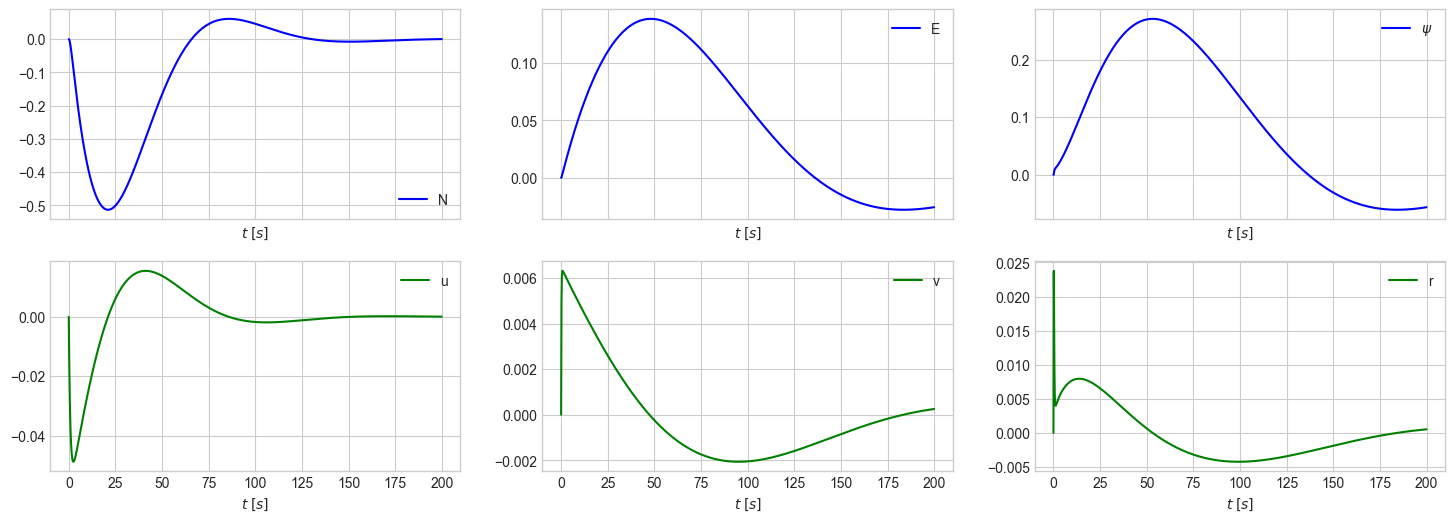

In [3]:
plot_results(x)

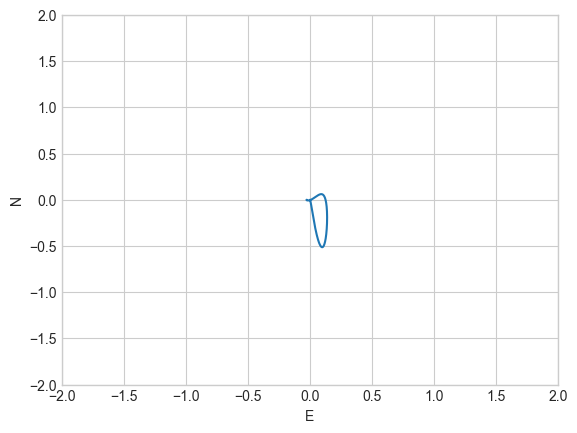

In [4]:
plt.plot(x[:, 1], x[:, 0])
plt.xlim(-2, 2)
plt.ylim(-2, 2)
plt.xlabel("E")
plt.ylabel("N")
plt.show()